In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

 

(2688, 23)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_num_params',
       'arc_latent_volume', 'arc_num_conv', 'arc_skip', 'arc_kernel',
       'test_swaps', 'train_loss', 'valid_loss', 'test_loss', 'valid_F1',
       'train_F1', 'test_F1', 'train_Accuracy', 'valid_Accuracy',
       'test_Accuracy', 'train_Accuracy_seq', 'valid_Accuracy_seq',
       'test_Accuracy_seq', 'name', 'train_swaps'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,arc_kernel,test_swaps,train_loss,...,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,name,train_swaps
1554,skip1_kernel7_noise_0.2_n4_2_n8_1-0.5,"[4, 8]",1,1256,512.0,2,1,7,0.5,NaN,...,NaN,0.639803,NaN,NaN,0.639803,NaN,NaN,0.0,skip1_kernel7_noise_0.2_n4_2_n8_1-0.5,0.2
1696,skip0_kernel13_noise_0.2_n4_0_n8_1-0.9,"[4, 8]",1,1976,512.0,2,0,13,0.9,NaN,...,NaN,0.334537,NaN,NaN,0.334537,NaN,NaN,0.0,skip0_kernel13_noise_0.2_n4_0_n8_1-0.9,0.2


In [4]:
import re

def extract_name(run_name):
    match = re.search(
        r'(skip\d+)_kernel(\d+)_noise_\d+(\.\d+)?_(n4_\d+_n8_\d+)', run_name
    )
    if match:
        return f"{match.group(1)}_k_{match.group(2)}_{match.group(4)}"
    return None

# Aplicar la función
df['name'] = df['run_name'].apply(extract_name)

 
print(df[['run_name', 'name']].sample(5))

                                    run_name                  name
1424   skip1_kernel7_noise_0.3_n4_1_n8_0-0.9   skip1_k_7_n4_1_n8_0
1837  skip0_kernel11_noise_0.2_n4_1_n8_0-0.1  skip0_k_11_n4_1_n8_0
396   skip1_kernel11_noise_0.7_n4_2_n8_1-0.2  skip1_k_11_n4_2_n8_1
2380  skip1_kernel11_noise_0.0_n4_1_n8_1-0.2  skip1_k_11_n4_1_n8_1
2242  skip1_kernel13_noise_0.1_n4_0_n8_0-0.5  skip1_k_13_n4_0_n8_0


In [5]:
df['train_swaps'] = df['run_name'].str.extract(r'noise_([0-9.]+)') 
df.sample(2)

,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,arc_kernel,test_swaps,train_loss,...,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq,name,train_swaps
501,skip0_kernel7_noise_0.7_n4_1_n8_1-0.1,"[4, 8]",1,1208,512.0,2,0,7,0.1,NaN,...,NaN,0.705220,NaN,NaN,0.705220,NaN,NaN,0.0,skip0_k_7_n4_1_n8_1,0.7
1270,skip0_kernel7_noise_0.3_n4_1_n8_1-0.0,"[4, 8]",1,1208,512.0,2,0,7,0.0,NaN,...,NaN,0.528627,NaN,NaN,0.528627,NaN,NaN,0.0,skip0_k_7_n4_1_n8_1,0.3


In [6]:
df['name'].unique()

array(['skip1_k_13_n4_2_n8_1', 'skip1_k_11_n4_2_n8_1',
       'skip1_k_7_n4_2_n8_1', 'skip1_k_3_n4_2_n8_1',
       'skip0_k_13_n4_2_n8_1', 'skip0_k_11_n4_2_n8_1',
       'skip0_k_7_n4_2_n8_1', 'skip0_k_3_n4_2_n8_1',
       'skip1_k_13_n4_1_n8_1', 'skip1_k_11_n4_1_n8_1',
       'skip1_k_7_n4_1_n8_1', 'skip1_k_3_n4_1_n8_1',
       'skip0_k_13_n4_1_n8_1', 'skip0_k_11_n4_1_n8_1',
       'skip0_k_7_n4_1_n8_1', 'skip0_k_3_n4_1_n8_1',
       'skip1_k_13_n4_0_n8_1', 'skip1_k_11_n4_0_n8_1',
       'skip1_k_7_n4_0_n8_1', 'skip1_k_3_n4_0_n8_1',
       'skip0_k_13_n4_0_n8_1', 'skip0_k_11_n4_0_n8_1',
       'skip0_k_7_n4_0_n8_1', 'skip0_k_3_n4_0_n8_1',
       'skip1_k_13_n4_2_n8_0', 'skip1_k_11_n4_2_n8_0',
       'skip1_k_7_n4_2_n8_0', 'skip1_k_3_n4_2_n8_0',
       'skip0_k_13_n4_2_n8_0', 'skip0_k_11_n4_2_n8_0',
       'skip0_k_7_n4_2_n8_0', 'skip0_k_3_n4_2_n8_0',
       'skip1_k_13_n4_1_n8_0', 'skip1_k_11_n4_1_n8_0',
       'skip1_k_7_n4_1_n8_0', 'skip1_k_3_n4_1_n8_0',
       'skip0_k_13_n4_1_n8_0

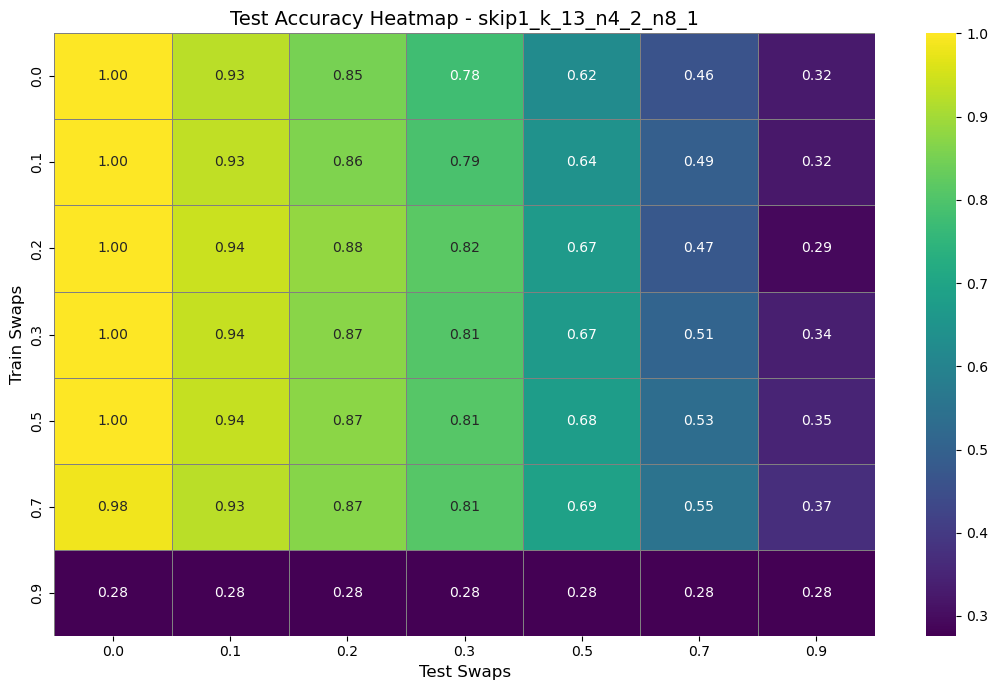

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que los datos estén bien tipados
df["train_swaps"] = df["train_swaps"].astype(float)
df["test_swaps"] = df["test_swaps"].astype(float)
df["test_Accuracy"] = df["test_Accuracy"].astype(float)

# Obtener todos los run_names únicos
run_names = df['name'].unique()

# Crear un heatmap por cada run_name
run = next(iter(run_names))
sub_df = df[df['name'] == run]

# Agrupar por train_swaps y test_swaps, y promediar test_Accuracy
heatmap_data = sub_df.groupby(['train_swaps', 'test_swaps'])['test_Accuracy'].mean().reset_index()

# Crear matriz para heatmap
pivot_table = heatmap_data.pivot(index='train_swaps', columns='test_swaps', values='test_Accuracy')
pivot_table = pivot_table.sort_index(axis=0).sort_index(axis=1)

# Crear figura
plt.figure(figsize=(11, 7))
sns.heatmap(
    pivot_table,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar=True
)

plt.title(f"Test Accuracy Heatmap - {run}", fontsize=14)
plt.xlabel("Test Swaps", fontsize=12)
plt.ylabel("Train Swaps", fontsize=12)
plt.tight_layout()
# plt.savefig(f'heatmaps/{run}heatmap.png')
plt.show()
plt.close()

In [8]:
!ls heatmaps

skip0_k_11_n4_0_n8_0heatmap.png  skip1_k_11_n4_0_n8_0heatmap.png
skip0_k_11_n4_0_n8_1heatmap.png  skip1_k_11_n4_0_n8_1heatmap.png
skip0_k_11_n4_1_n8_0heatmap.png  skip1_k_11_n4_1_n8_0heatmap.png
skip0_k_11_n4_1_n8_1heatmap.png  skip1_k_11_n4_1_n8_1heatmap.png
skip0_k_11_n4_2_n8_0heatmap.png  skip1_k_11_n4_2_n8_0heatmap.png
skip0_k_11_n4_2_n8_1heatmap.png  skip1_k_11_n4_2_n8_1heatmap.png
skip0_k_13_n4_0_n8_0heatmap.png  skip1_k_13_n4_0_n8_0heatmap.png
skip0_k_13_n4_0_n8_1heatmap.png  skip1_k_13_n4_0_n8_1heatmap.png
skip0_k_13_n4_1_n8_0heatmap.png  skip1_k_13_n4_1_n8_0heatmap.png
skip0_k_13_n4_1_n8_1heatmap.png  skip1_k_13_n4_1_n8_1heatmap.png
skip0_k_13_n4_2_n8_0heatmap.png  skip1_k_13_n4_2_n8_0heatmap.png
skip0_k_13_n4_2_n8_1heatmap.png  skip1_k_13_n4_2_n8_1heatmap.png
skip0_k_3_n4_0_n8_0heatmap.png	 skip1_k_3_n4_0_n8_0heatmap.png
skip0_k_3_n4_0_n8_1heatmap.png	 skip1_k_3_n4_0_n8_1heatmap.png
skip0_k_3_n4_1_n8_0heatmap.png	 skip1_k_3_n4_1_n8_0heatmap.png
skip0_k_3_n4_1_n8_1heatmap.png	

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.image as mpimg

# Lista de posibles combinaciones
nc_values = ['2']
n4_values = ['0', '1', '2']
n8_values = ['0', '1']
skip_values = ['0', '1']
kernel_values = ['3', '7', '11','13']
# Función para cargar y mostrar los heatmaps
def update_heatmap(n4, n8, k):
    # Crear el nombre del archivo para skip=0
    file_name_skip0 = f"skip0_k_{k}_n4_{n4}_n8_{n8}heatmap.png"
    # Crear el nombre del archivo para skip=1
    file_name_skip1 = f"skip1_k_{k}_n4_{n4}_n8_{n8}heatmap.png"
    
    # Cargar las imágenes correspondientes
    img_skip0 = mpimg.imread(f"heatmaps/{file_name_skip0}")
    img_skip1 = mpimg.imread(f"heatmaps/{file_name_skip1}")
    
    # Crear la figura con 2 subgráficos (uno para skip=0 y otro para skip=1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Mostrar la imagen para skip=0
    axes[0].imshow(img_skip0)
    axes[0].axis('off')  # Eliminar los ejes para mostrar solo la imagen
    axes[0].set_title(f'skip=0: k={k},  n4={n4}, n8={n8}')
    
    # Mostrar la imagen para skip=1
    axes[1].imshow(img_skip1)
    axes[1].axis('off')  # Eliminar los ejes para mostrar solo la imagen
    axes[1].set_title(f'skip=1: k={k}, n4={n4}, n8={n8}')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

# Crear los sliders interactivos
n4_slider = widgets.Dropdown(options=n4_values, description='n4:', value='0')
n8_slider = widgets.Dropdown(options=n8_values, description='n8:', value='0')
k_slider = widgets.Dropdown(options=kernel_values, description='k:', value='3')

# Usar interact para vincular los sliders a la función
widgets.interactive(update_heatmap, k=k_slider,n4=n4_slider, n8=n8_slider)


interactive(children=(Dropdown(description='n4:', options=('0', '1', '2'), value='0'), Dropdown(description='n…